In [8]:
from src.backend.model import StarPolygon, Point, Circle
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

In [51]:
def generate_star_polygon(center: Point, n_vertices: int = 5, min_radius: float = 10,
                          max_radius: float = 20) -> StarPolygon:
    distance = np.random.rand(n_vertices)
    alpha = np.sort((np.random.rand(n_vertices) * 360))
    params = np.stack([alpha, distance])
    parameters_rad = (params * np.asarray([[np.pi / 180], [max_radius - min_radius]]))
    delta_xs = np.cos(parameters_rad[0]) * parameters_rad[1]
    delta_ys = np.sin(parameters_rad[0]) * parameters_rad[1]
    points = [
        Point(x=center.x + delta_x, y=center.y + delta_y) for delta_x, delta_y in zip(delta_xs, delta_ys)
    ]
    return StarPolygon(points=points)
    
    
def draw_polygon(polygon: StarPolygon, center: Point) -> None:
    x = [point.x for point in polygon.points]
    y = [point.y for point in polygon.points]
    plt.plot(x, y)
    plt.plot(center.x, center.y)

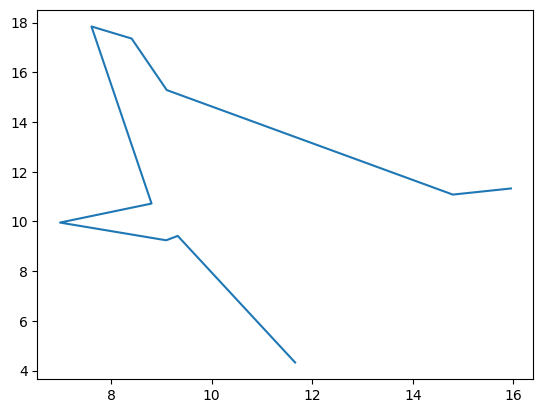

In [53]:
center = Point(x=10, y=10)
polygon = generate_star_polygon(center=center, n_vertices=10)
draw_polygon(polygon=polygon, center=center)